In [17]:
import numpy as np
import tensorflow as tf
from tf_keras.src.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Test set Image Processing

In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17557 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

Loading Model

In [19]:
cnn = tf.keras.models.load_model('trained_model.keras')

Visualising and Performing Prediction on Single image

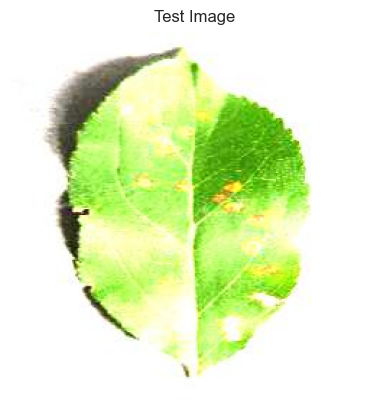

In [20]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


Testing Model

In [21]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


In [22]:
print(input_arr.shape)

(1, 128, 128, 3)


In [23]:
print(predictions)

[[9.8910537e-03 1.6809494e-03 1.0317877e-01 2.9141226e-04 2.6972445e-03
  2.6736407e-02 7.8106974e-03 1.5841110e-02 4.0658128e-02 6.8248538e-03
  2.5596330e-03 9.5834760e-03 2.6980124e-03 2.6624173e-01 5.8168108e-03
  1.4308928e-01 3.6596909e-02 2.4047052e-04 2.0915914e-02 4.3674987e-03
  9.8489851e-02 7.5084283e-03 1.4323024e-03 4.3440266e-03 3.2211561e-04
  7.2335461e-03 6.8909809e-02 7.1941153e-03 1.2776127e-02 1.7522076e-03
  1.3040655e-02 1.5238327e-03 1.7083360e-02 1.0346123e-03 7.9313735e-04
  4.7673877e-02 2.5797784e-04 9.0962090e-04]]


In [24]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

13


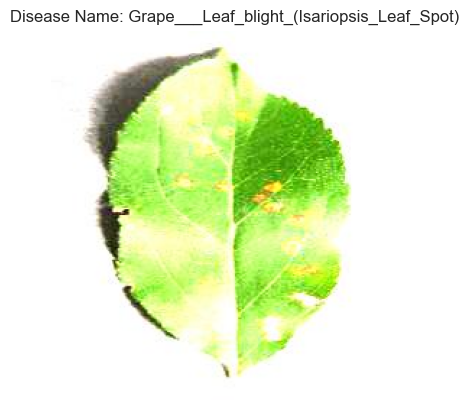

In [25]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()